In [35]:
import torch
import pandas as pd
from torch import nn
from torch import autograd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [103]:
data = pd.read_csv("./data/housing.csv")
print(data.shape)
data.head()

(505, 1)


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [57]:
data.columns

Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [82]:
columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen']
df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=columns)

In [83]:
df.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [84]:
X = df.drop(['fourteen'],axis=1)
y = df['fourteen']

In [85]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
train_inputs = torch.tensor(X_train.values)
train_labels = torch.tensor(y_train.values)

test_inputs = torch.tensor(X_test.values)
test_labels = torch.tensor(y_test.values)

In [87]:
scaler = StandardScaler()
train_inputs_scaled = scaler.fit_transform(train_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [88]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(13, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [89]:
model = LinearRegressionModel()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)

In [90]:
epochs = 200
epoch_counts = []
train_loss_vals = []
test_loss_vals = []

In [91]:
for epoch in range(epochs):
    epoch += 1
    
    inputs = torch.from_numpy(train_inputs_scaled.astype(np.float32)).requires_grad_()
    labels = torch.tensor(train_labels, dtype=torch.float32)

    optimizer.zero_grad() 

    outputs = model(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(torch.from_numpy(test_inputs_scaled.astype(np.float32)))
        test_loss = criterion(test_pred, test_labels)
        if epoch%10==0:
            epoch_counts.append(epoch)
            train_loss_vals.append(loss)
            test_loss_vals.append(test_loss)
            print('Epoch: {} | Loss: {} | Test Loss: {}'.format(epoch, loss, test_loss))


Epoch: 10 | Loss: 21.108644485473633 | Test Loss: 19.724714783944336
Epoch: 20 | Loss: 19.1086483001709 | Test Loss: 17.722558748245422
Epoch: 30 | Loss: 17.113361358642578 | Test Loss: 15.63082169529476
Epoch: 40 | Loss: 15.158122062683105 | Test Loss: 13.719226890836758
Epoch: 50 | Loss: 13.33612060546875 | Test Loss: 11.862339402308422
Epoch: 60 | Loss: 11.650619506835938 | Test Loss: 10.255483987669631
Epoch: 70 | Loss: 10.161168098449707 | Test Loss: 8.820370681759762
Epoch: 80 | Loss: 9.001482963562012 | Test Loss: 7.6958601918600005
Epoch: 90 | Loss: 8.144760131835938 | Test Loss: 6.87841299211736
Epoch: 100 | Loss: 7.511183738708496 | Test Loss: 6.282558922362484
Epoch: 110 | Loss: 7.073217391967773 | Test Loss: 5.940462239876658
Epoch: 120 | Loss: 6.834506034851074 | Test Loss: 5.820500788015845
Epoch: 130 | Loss: 6.74057149887085 | Test Loss: 5.824248433727248
Epoch: 140 | Loss: 6.705705165863037 | Test Loss: 5.861897680127863
Epoch: 150 | Loss: 6.693199634552002 | Test Loss:

In [92]:
train_loss_vist = [tensor.item() for tensor in train_loss_vals]
test_loss_vist = [tensor.item() for tensor in test_loss_vals]

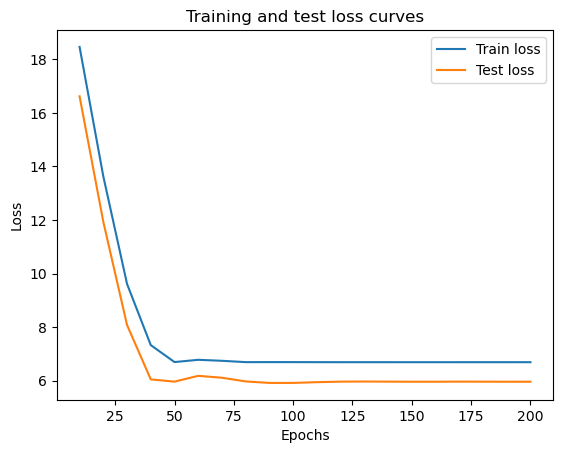

In [81]:
plt.plot(epoch_counts, train_loss_vist, label="Train loss")
plt.plot(epoch_counts, test_loss_vist, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();